# Import Libraries 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [46]:
data = pd.read_csv('test.csv') 

In [47]:
data.head(5)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [49]:
data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [50]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [51]:
data.shape

(300, 2)

In [52]:
x = data['x'] 
y = data['y']

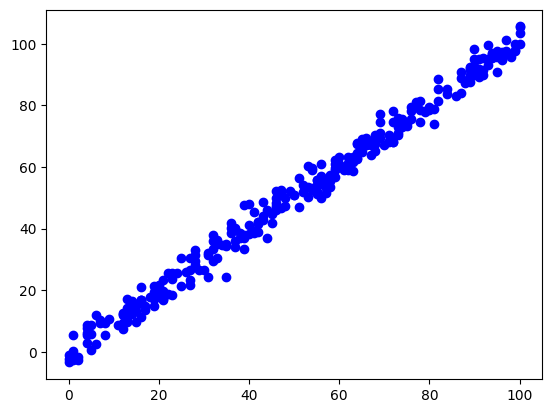

In [53]:
plt.scatter(x, y, c='b') 
plt.show()

In [54]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
x_train.shape

(240,)

In [56]:
x_test.shape

(60,)

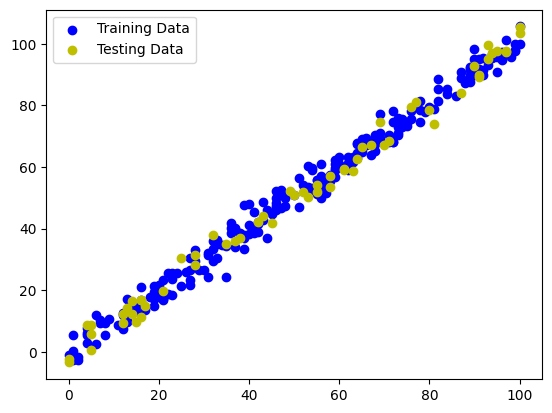

In [57]:
plt.scatter(x_train, y_train, c='b', label='Training Data') 
plt.scatter(x_test, y_test, c='y', label='Testing Data') 
plt.legend() 
plt.show()

# Model Building

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

# compile the model with a lower learning rate
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# train the model
epoch_number = 10
history = model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.6096 - mae: 33.6096  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8784 - mae: 9.8784   
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2323 - mae: 6.2323 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4610 - mae: 3.4610 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4821 - mae: 3.4821 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9121 - mae: 2.9121 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5914 - mae: 2.5914 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3772 - mae: 2.3772 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4729 - mae: 2.4729 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4103 - mae: 2.4103 


In [90]:
model.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)                    │ (None, 8)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77 (312.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52 (212.00 B)

In [91]:
y_prediction = model.predict(x_test)
y_prediction[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


array([[90.262794 ],
       [76.2891   ],
       [94.25527  ],
       [ 5.4225087],
       [91.26092  ]], dtype=float32)

In [92]:
y_test.head()

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

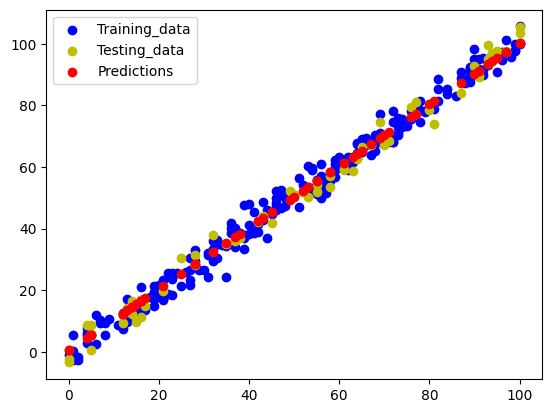

In [94]:
plt.scatter(x_train, y_train, c='b', label='Training_data')  
plt.scatter(x_test, y_test, c='y', label='Testing_data') 
plt.scatter(x_test, y_prediction, c='r', label='Predictions') 
plt.legend() 
plt.show() 

# Model Evaluate

In [95]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.6271 - mae: 2.6271 


[2.554656744003296, 2.554656744003296]

##### Mean Absolute Error - ( MAE )

In [98]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_prediction))
mae = mae_metric.result().numpy()  

print("Mean Absolute Error ( MAE ) : ", mae)

Mean Absolute Error ( MAE ) :  2.554657


In [99]:
print('Predicted Value Shape : ', y_prediction.shape)

Predicted Value Shape :  (60, 1)


In [100]:
print('Test Data Shape : ',y_test.shape)

Test Data Shape :  (60,)


In [101]:
print('Using "squeeze" After Prediction Value Shape : ', tf.squeeze(y_prediction).shape)

Using "squeeze" After Prediction Value Shape :  (60,)


##### Mean Squared Error ( MSE )

In [102]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_prediction))
mse = mse_metric.result().numpy()

print("Mean Squared Error ( MSE ) : ", mse)

Mean Squared Error ( MSE ) :  9.601017


##### Root Mean Squared Error ( RMSE )

In [103]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_prediction))
rmse = tf.sqrt(mse_metric.result()).numpy()

print("Root Mean Squared Error ( RMSE ) : ", rmse)

Root Mean Squared Error ( RMSE ) :  3.0985508


##### Visualize MAE, MSE, and RMSE

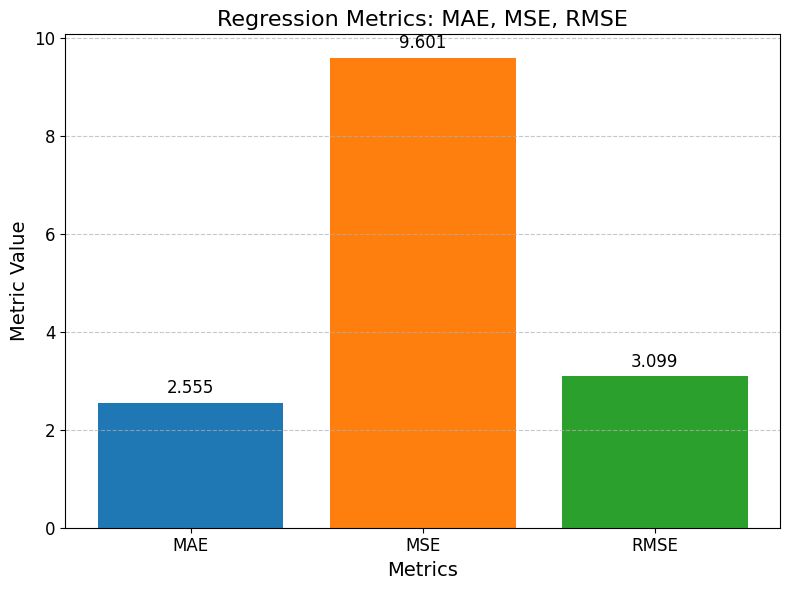

In [105]:
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]  

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Regression Metrics: MAE, MSE, RMSE', fontsize=16)
plt.ylabel('Metric Value', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(values):
    plt.text(i, value + 0.02 * max(values), f"{value:.3f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Visualizing Model Training Loss Across Epochs

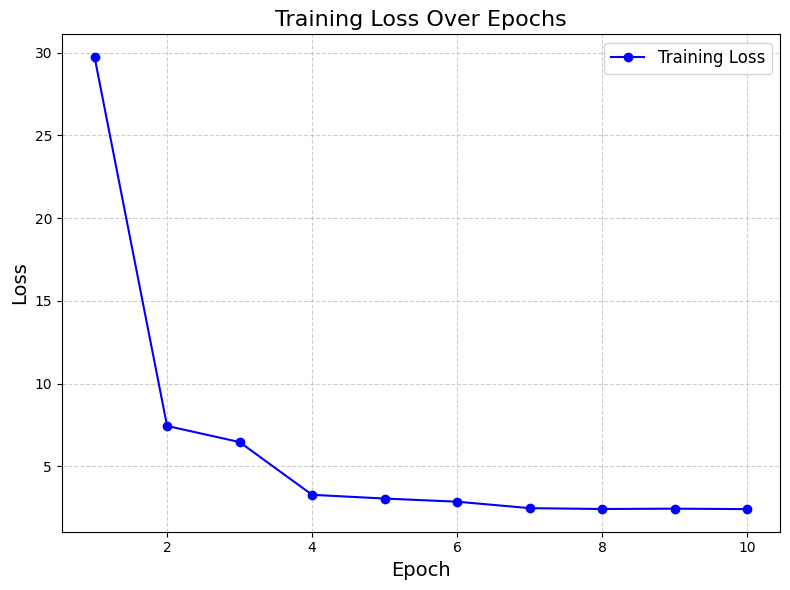

In [108]:
import matplotlib.pyplot as plt

x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.figure(figsize=(8, 6))
plt.plot(x_range, loss, label='Training Loss', color='blue', marker='o')
plt.xlabel('Epoch', fontsize=14)  
plt.ylabel('Loss', fontsize=14)  
plt.title('Training Loss Over Epochs', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

##### Inspecting and Visualizing Model Weights and Biases


Layer 1:
Weights:
[[-0.00705368  0.07071335  0.78147686 -0.0264849   0.14935093 -0.08167526
  -0.47050267 -0.07866177]]
Biases:
[-0.11736372 -0.14804238  0.09746048  0.19238652 -0.11791871 -0.09082126
 -0.09858313  0.26575583]


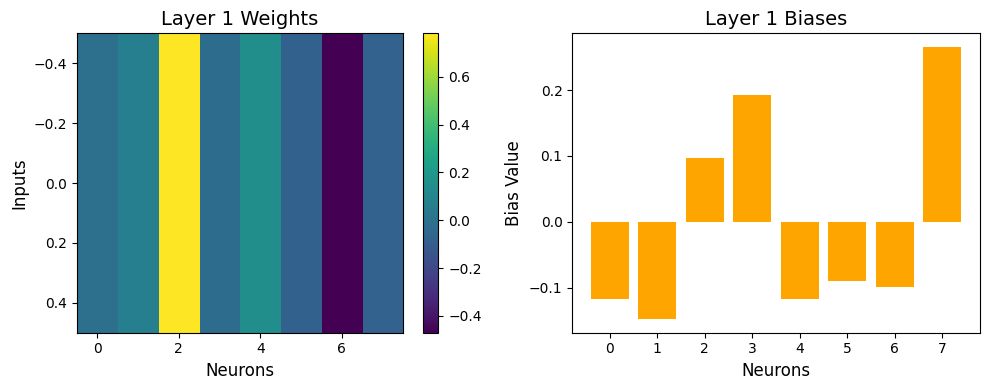


Layer 2:
Weights:
[[-5.1047790e-01]
 [-9.9714279e-02]
 [ 8.2421529e-01]
 [-3.4164242e-04]
 [-6.2453496e-01]
 [-1.7009689e-01]
 [-9.2214036e-01]
 [-3.7753846e-02]]
Biases:
[0.10700019]


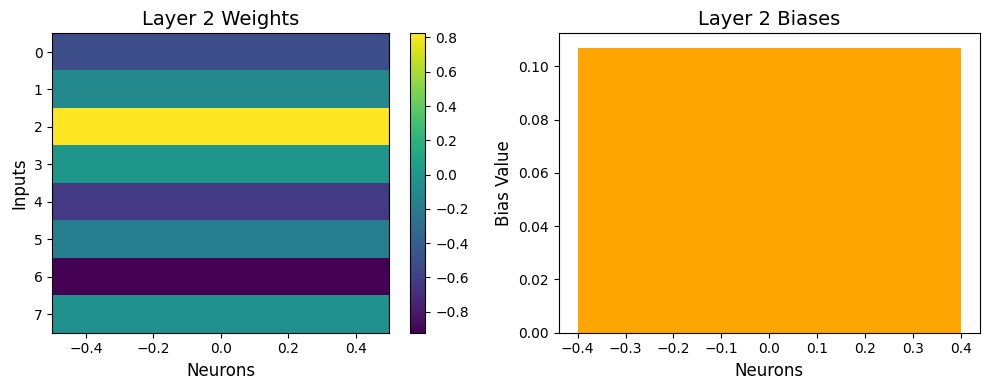

In [111]:
for i, layer in enumerate(model.layers):
    # Extract weights and biases of the layer
    weights = layer.get_weights()[0]  
    biases = layer.get_weights()[1]   
    
    print(f"\nLayer {i + 1}:")
    print(f"Weights:\n{weights}")
    print(f"Biases:\n{biases}")
    
    # Visualize weights and biases 
    if weights.size > 0:  
        plt.figure(figsize=(10, 4))
        
        # Visualize weights as a heatmap
        plt.subplot(1, 2, 1)
        plt.imshow(weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Layer {i + 1} Weights', fontsize=14)
        plt.xlabel('Neurons', fontsize=12)
        plt.ylabel('Inputs', fontsize=12)

        # Visualize biases as a bar plot
        plt.subplot(1, 2, 2)
        plt.bar(range(len(biases)), biases, color='orange')
        plt.title(f'Layer {i + 1} Biases', fontsize=14)
        plt.xlabel('Neurons', fontsize=12)
        plt.ylabel('Bias Value', fontsize=12)

        plt.tight_layout()
        plt.show()